In [2]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization

In [3]:
batch_size = 128
num_classes = 10
epochs = 12
epochs_v2 = 20

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty):
  fig = plt.figure( )
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Categorical Crossentropy Loss')
  plt.legend()
  plt.grid()
  plt.show()

## CNN with three layers(32-64-128)

In [11]:
convnet3=Sequential() # Initializing the model

# First ConvNet
convnet3.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))
# Second ConvNet

convnet3.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu'))

convnet3.add(Dropout(0.25))

# Third ConvNet


convnet3.add(Conv2D(128,kernel_size=(3,3),
                   activation='relu'))
#maxpooling by (2,2 ) ,dropout,flattening
convnet3.add(MaxPooling2D(pool_size=(2,2)))
convnet3.add(Dropout(0.25))
convnet3.add(Flatten())

#hidden_layer
convnet3.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet3.add(Dropout(0.5))
convnet3.add(Dense(num_classes,activation='softmax'))
print(convnet3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15488)            

In [12]:
#Model compilation
convnet3.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet3_history=convnet3.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

W0908 12:50:43.899175  8156 deprecation_wrapper.py:119] From C:\Anaconda\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0908 12:50:44.885874  8156 deprecation.py:323] From C:\Anaconda\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 460s 8ms/step - loss: 0.1739 - acc: 0.9465 - val_loss: 0.0487 - val_acc: 0.9833
Epoch 2/12
60000/60000 [==============================] - 437s 7ms/step - loss: 0.0622 - acc: 0.9810 - val_loss: 0.0290 - val_acc: 0.9906
Epoch 3/12
60000/60000 [==============================] - 434s 7ms/step - loss: 0.0451 - acc: 0.9859 - val_loss: 0.0265 - val_acc: 0.9909
Epoch 4/12
60000/60000 [==============================] - 433s 7ms/step - loss: 0.0369 - acc: 0.9886 - val_loss: 0.0270 - val_acc: 0.9914
Epoch 5/12
60000/60000 [==============================] - 438s 7ms/step - loss: 0.0305 - acc: 0.9901 - val_loss: 0.0283 - val_acc: 0.9908
Epoch 6/12
60000/60000 [==============================] - 431s 7ms/step - loss: 0.0265 - acc: 0.9914 - val_loss: 0.0244 - val_acc: 0.9923
Epoch 7/12
60000/60000 [==============================] - 431s 7ms/step - loss: 0.0231 - acc: 0.9928 - val_loss: 0.0237 - 

test score : 0.02572378181961908
test sccuracy : 0.9926


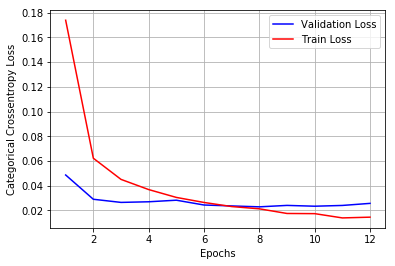

In [13]:
#evaluating model

score=convnet3.evaluate(x_test,y_test,verbose=0)
test_score3=score[0]
test_accuracy3=score[1]
train_accuracy3=max(convnet3_history.history['acc'])
print('test score :',test_score3)
print('test sccuracy :',test_accuracy3)
# error plot
x=list(range(1,epochs+1))
vy=convnet3_history.history['val_loss'] 
ty=convnet3_history.history['loss'] 
plt_dynamic(x, vy, ty)

### Without dropout and BatchNormalization kernel size (3,3)

In [10]:
convnet3_1=Sequential() # Initializing the model

# First ConvNet
convnet3_1.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))
# Second ConvNet

convnet3_1.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu'))
#maxpooling by (2,2 ) ,dropout,flattening
convnet3_1.add(MaxPooling2D(pool_size=(2,2)))

# Third ConvNet

convnet3_1.add(Conv2D(128,kernel_size=(3,3),
                   activation='relu'))
#maxpooling by (2,2 ) ,dropout,flattening
convnet3_1.add(MaxPooling2D(pool_size=(2,2)))
convnet3_1.add(Flatten())

#hidden_layer
convnet3_1.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet3_1.add(Dense(num_classes,activation='softmax'))
print(convnet3_1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)              

In [11]:
#Model compilation
convnet3_1.compile(optimizer=keras.optimizers.Adadelta(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet3_1_history=convnet3_1.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs_v2,
                             verbose=1,
                             validation_data=(x_test, y_test))

W0914 12:10:01.682247 10944 deprecation_wrapper.py:119] From C:\Anaconda\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0914 12:10:01.694217 10944 deprecation_wrapper.py:119] From C:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.

W0914 12:10:02.713346 10944 deprecation.py:323] From C:\Anaconda\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 198s 3ms/step - loss: 0.1804 - acc: 0.9441 - val_loss: 0.0441 - val_acc: 0.9858
Epoch 2/20
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0407 - acc: 0.9873 - val_loss: 0.0356 - val_acc: 0.9884
Epoch 3/20
60000/60000 [==============================] - 194s 3ms/step - loss: 0.0260 - acc: 0.9918 - val_loss: 0.0236 - val_acc: 0.9925
Epoch 4/20
60000/60000 [==============================] - 185s 3ms/step - loss: 0.0175 - acc: 0.9947 - val_loss: 0.0244 - val_acc: 0.9920
Epoch 5/20
60000/60000 [==============================] - 185s 3ms/step - loss: 0.0135 - acc: 0.9957 - val_loss: 0.0263 - val_acc: 0.9924
Epoch 6/20
60000/60000 [==============================] - 186s 3ms/step - loss: 0.0090 - acc: 0.9973 - val_loss: 0.0307 - val_acc: 0.9915
Epoch 7/20
60000/60000 [==============================] - 181s 3ms/step - loss: 0.0070 - acc: 0.9978 - val_loss: 0.0284 - 

test score : 0.03690634640476892
test sccuracy : 0.9942


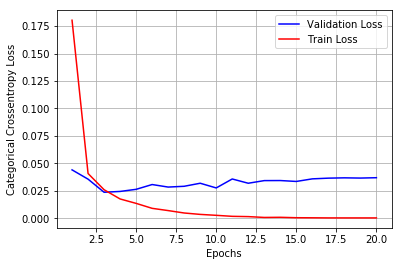

In [13]:
#evaluating model

score=convnet3_1.evaluate(x_test,y_test,verbose=0)
test_score3_1=score[0]
test_accuracy3_1=score[1]
train_accuracy3_1=max(convnet3_1_history.history['acc'])
print('test score :',test_score3_1)
print('test sccuracy :',test_accuracy3_1)
# error plot
x=list(range(1,epochs_v2+1))
vy=convnet3_1_history.history['val_loss'] 
ty=convnet3_1_history.history['loss'] 
plt_dynamic(x, vy, ty)

### With dropout rate(0.5)

In [14]:
convnet3_2=Sequential() # Initializing the model

# First ConvNet
convnet3_2.add(Conv2D(32,kernel_size=(3,3),
                    activation='relu',
                    input_shape=input_shape))
# Second ConvNet

convnet3_2.add(Conv2D(64,kernel_size=(3,3),
                    activation='relu'))
convnet3_2.add(Dropout(0.5))
#maxpooling by (2,2 ) ,dropout,flattening
convnet3_2.add(MaxPooling2D(pool_size=(2,2)))

# Third ConvNet

convnet3_2.add(Conv2D(128,kernel_size=(3,3),
                   activation='relu'))
convnet3_2.add(Dropout(0.5))

#maxpooling by (2,2 ) ,dropout,flattening
convnet3_2.add(MaxPooling2D(pool_size=(2,2)))
convnet3_2.add(Flatten())

#hidden_layer
convnet3_2.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet3_2.add(Dense(num_classes,activation='softmax'))
print(convnet3_2.summary())

W0914 13:29:53.814382 10944 deprecation.py:506] From C:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:3733: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 10, 128)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 128)        

In [15]:
#Model compilation
convnet3_2.compile(optimizer=keras.optimizers.Adadelta(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet3_2_history=convnet3_2.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs_v2,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 267s 4ms/step - loss: 0.1833 - acc: 0.9431 - val_loss: 0.1118 - val_acc: 0.9854
Epoch 2/20
60000/60000 [==============================] - 264s 4ms/step - loss: 0.0480 - acc: 0.9853 - val_loss: 0.0940 - val_acc: 0.9915
Epoch 3/20
60000/60000 [==============================] - 282s 5ms/step - loss: 0.0341 - acc: 0.9892 - val_loss: 0.0576 - val_acc: 0.9912
Epoch 4/20
60000/60000 [==============================] - 270s 5ms/step - loss: 0.0281 - acc: 0.9910 - val_loss: 0.0479 - val_acc: 0.9926
Epoch 5/20
60000/60000 [==============================] - 245s 4ms/step - loss: 0.0225 - acc: 0.9928 - val_loss: 0.0499 - val_acc: 0.9921
Epoch 6/20
60000/60000 [==============================] - 237s 4ms/step - loss: 0.0199 - acc: 0.9938 - val_loss: 0.0418 - val_acc: 0.9933
Epoch 7/20
60000/60000 [==============================] - 236s 4ms/step - loss: 0.0164 - acc: 0.9947 - val_loss: 0.0426 - 

test score : 0.021739475865848363
test sccuracy : 0.9935


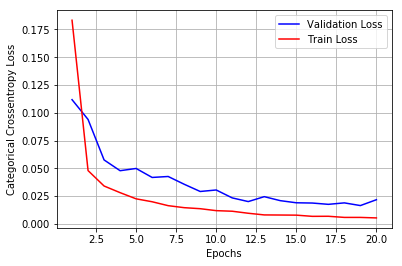

In [16]:
#evaluating model

score=convnet3_2.evaluate(x_test,y_test,verbose=0)
test_score3_2=score[0]
test_accuracy3_2=score[1]
train_accuracy3_2=max(convnet3_2_history.history['acc'])
print('test score :',test_score3_2)
print('test sccuracy :',test_accuracy3_2)
# error plot
x=list(range(1,epochs_v2+1))
vy=convnet3_2_history.history['val_loss'] 
ty=convnet3_2_history.history['loss'] 
plt_dynamic(x, vy, ty)

### With dropout(0.5) and BatchNormalization

In [17]:
convnet3_3=Sequential() # Initializing the model

# First ConvNet
convnet3_3.add(Conv2D(32,kernel_size=(3,3),
                    activation='sigmoid',
                    input_shape=input_shape))
# Second ConvNet

convnet3_3.add(Conv2D(64,kernel_size=(3,3),
                    activation='sigmoid'))
convnet3_3.add(Dropout(0.5))
convnet3_3.add(BatchNormalization())


#maxpooling by (2,2 ) ,dropout,flattening
convnet3_3.add(MaxPooling2D(pool_size=(2,2)))

# Third ConvNet

convnet3_3.add(Conv2D(128,kernel_size=(3,3),
                   activation='sigmoid'))
convnet3_3.add(Dropout(0.5))
convnet3_3.add(BatchNormalization())


#maxpooling by (2,2 ) ,dropout,flattening
convnet3_3.add(MaxPooling2D(pool_size=(2,2)))
convnet3_3.add(Flatten())

#hidden_layer
convnet3_3.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet3_3.add(Dense(num_classes,activation='softmax'))
print(convnet3_3.summary())

W0914 15:02:29.280371 10944 deprecation_wrapper.py:119] From C:\Anaconda\lib\site-packages\keras\backend\tensorflow_backend.py:2041: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 10, 128)      

In [19]:
#Model compilation
convnet3_3.compile(optimizer=keras.optimizers.Adagrad(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet3_3_history=convnet3_3.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs_v2,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 574s 10ms/step - loss: 12.9474 - acc: 0.1947 - val_loss: 13.6816 - val_acc: 0.1126
Epoch 2/20
60000/60000 [==============================] - 574s 10ms/step - loss: 12.9507 - acc: 0.1959 - val_loss: 13.7421 - val_acc: 0.1139
Epoch 3/20
60000/60000 [==============================] - 571s 10ms/step - loss: 12.9496 - acc: 0.1962 - val_loss: 13.6505 - val_acc: 0.1190
Epoch 4/20
60000/60000 [==============================] - 571s 10ms/step - loss: 12.9493 - acc: 0.1964 - val_loss: 13.4547 - val_acc: 0.1338
Epoch 5/20
60000/60000 [==============================] - 574s 10ms/step - loss: 12.9494 - acc: 0.1963 - val_loss: 13.7893 - val_acc: 0.1123
Epoch 6/20
60000/60000 [==============================] - 575s 10ms/step - loss: 12.3547 - acc: 0.2313 - val_loss: 12.0876 - val_acc: 0.1896
Epoch 7/20
60000/60000 [==============================] - 570s 9ms/step - loss: 9.6938 - acc: 0.3957 - v

test score : 11.572928186035156
test sccuracy : 0.2134


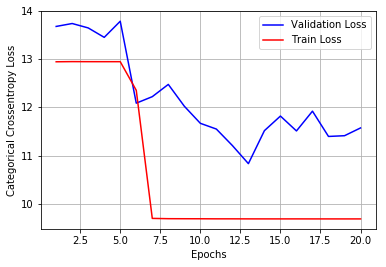

In [20]:
#evaluating model

score=convnet3_3.evaluate(x_test,y_test,verbose=0)
test_score3_3=score[0]
test_accuracy3_3=score[1]
train_accuracy3_3=max(convnet3_3_history.history['acc'])
print('test score :',test_score3_3)
print('test sccuracy :',test_accuracy3_3)
# error plot
x=list(range(1,epochs_v2+1))
vy=convnet3_3_history.history['val_loss'] 
ty=convnet3_3_history.history['loss'] 
plt_dynamic(x, vy, ty)

## CNN with five layers(16-32-64-128-256)


In [14]:
convnet5=Sequential() # Initializing the model

# First ConvNet
convnet5.add(Conv2D(16,kernel_size=(5,5),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape))
#Second Convnet

convnet5.add(Conv2D(32,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

#Third Convnet

convnet5.add(Conv2D(64,kernel_size=(5,5),
                    padding='same',
                   activation='relu'))  
#maxpooling by (2,2 ) ,dropout,flattening
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))

#Fourth Convnet

convnet5.add(Conv2D(128,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))
convnet5.add(MaxPooling2D(pool_size=(2,2)))

#Fifth Convnet
convnet5.add(Dropout(0.25))
convnet5.add(Conv2D(256,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.25))
convnet5.add(Flatten())

#hidden_layer
convnet5.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet5.add(BatchNormalization())
convnet5.add(Dropout(0.5))
convnet5.add(Dense(num_classes,activation='softmax'))
print(convnet5.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        12832     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 64)         

In [15]:
#Model compilation
convnet5.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet5_history=convnet5.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 479s 8ms/step - loss: 2.1579 - acc: 0.2672 - val_loss: 1.3136 - val_acc: 0.5212
Epoch 2/12
60000/60000 [==============================] - 456s 8ms/step - loss: 0.8318 - acc: 0.7122 - val_loss: 0.5597 - val_acc: 0.8003
Epoch 3/12
60000/60000 [==============================] - 445s 7ms/step - loss: 0.3037 - acc: 0.9088 - val_loss: 0.2165 - val_acc: 0.9351
Epoch 4/12
60000/60000 [==============================] - 417s 7ms/step - loss: 0.1576 - acc: 0.9536 - val_loss: 0.0700 - val_acc: 0.9794
Epoch 5/12
60000/60000 [==============================] - 416s 7ms/step - loss: 0.1033 - acc: 0.9703 - val_loss: 0.0654 - val_acc: 0.9807
Epoch 6/12
60000/60000 [==============================] - 416s 7ms/step - loss: 0.0799 - acc: 0.9769 - val_loss: 0.0364 - val_acc: 0.9890
Epoch 7/12
60000/60000 [==============================] - 416s 7ms/step - loss: 0.0667 - acc: 0.9807 - val_loss: 0.0299 - 

test score : 0.021438096237325226
test Accuracy : 0.9934


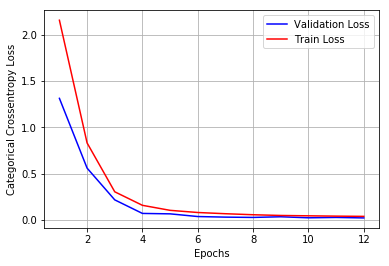

In [16]:
#evaluating model
score=convnet5.evaluate(x_test,y_test,verbose=0)
test_score5=score[0]
test_accuracy5=score[1]
train_accuracy5=max(convnet5_history.history['acc'])
print('test score :',test_score5)
print('test Accuracy :',test_accuracy5)
# error plot
x=list(range(1,epochs+1))
vy=convnet5_history.history['val_loss'] 
ty=convnet5_history.history['loss'] 
plt_dynamic(x, vy, ty)

### Without dropout and BatchNormalization

In [27]:
convnet5=Sequential() # Initializing the model

# First ConvNet
convnet5.add(Conv2D(16,kernel_size=(5,5),
                    activation='tanh',
                    padding='same',
                    input_shape=input_shape))
#Second Convnet

convnet5.add(Conv2D(32,kernel_size=(5,5),
                    padding='same',
                    activation='tanh'))
convnet5.add(MaxPooling2D(pool_size=(2,2)))

#Third Convnet

convnet5.add(Conv2D(64,kernel_size=(5,5),
                    padding='same',
                   activation='tanh'))  
#maxpooling by (2,2 ) ,dropout,flattening
convnet5.add(MaxPooling2D(pool_size=(2,2)))

#Fourth Convnet

convnet5.add(Conv2D(128,kernel_size=(5,5),
                    padding='same',
                    activation='tanh'))
convnet5.add(MaxPooling2D(pool_size=(2,2)))

#Fifth Convnet
convnet5.add(Conv2D(256,kernel_size=(5,5),
                    padding='same',
                    activation='tanh'))
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Flatten())

#hidden_layer
convnet5.add(Dense(256,
                   activation='tanh',
                   kernel_initializer=he_normal(seed=None)))
convnet5.add(Dense(num_classes,activation='softmax'))
print(convnet5.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 28, 28, 32)        12832     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 128)         204928    
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 3, 3, 128)        

In [23]:
#Model compilation
convnet5.compile(optimizer=keras.optimizers.Adamax(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet5_history=convnet5.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs_v2,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 419s 7ms/step - loss: 0.7800 - acc: 0.7291 - val_loss: 0.0849 - val_acc: 0.9747
Epoch 2/20
60000/60000 [==============================] - 418s 7ms/step - loss: 0.0958 - acc: 0.9716 - val_loss: 0.0479 - val_acc: 0.9845
Epoch 3/20
60000/60000 [==============================] - 419s 7ms/step - loss: 0.0613 - acc: 0.9817 - val_loss: 0.0395 - val_acc: 0.9866
Epoch 4/20
60000/60000 [==============================] - 419s 7ms/step - loss: 0.0500 - acc: 0.9841 - val_loss: 0.0424 - val_acc: 0.9869
Epoch 5/20
60000/60000 [==============================] - 421s 7ms/step - loss: 0.0387 - acc: 0.9884 - val_loss: 0.0410 - val_acc: 0.9867
Epoch 6/20
60000/60000 [==============================] - 418s 7ms/step - loss: 0.0324 - acc: 0.9901 - val_loss: 0.0330 - val_acc: 0.9902
Epoch 7/20
60000/60000 [==============================] - 420s 7ms/step - loss: 0.0256 - acc: 0.9920 - val_loss: 0.0381 - 

test score : 0.03129715899544244
test Accuracy : 0.9913


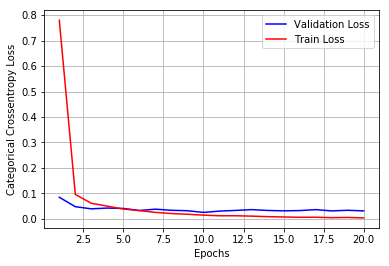

In [25]:
#evaluating model
score=convnet5.evaluate(x_test,y_test,verbose=0)
test_score5=score[0]
test_accuracy5=score[1]
train_accuracy5=max(convnet5_history.history['acc'])
print('test score :',test_score5)
print('test Accuracy :',test_accuracy5)
# error plot
x=list(range(1,epochs_v2+1))
vy=convnet5_history.history['val_loss'] 
ty=convnet5_history.history['loss'] 
plt_dynamic(x, vy, ty)

### With dropout rate(0.3)

In [30]:
convnet5=Sequential() # Initializing the model

# First ConvNet
convnet5.add(Conv2D(16,kernel_size=(5,5),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape))
#Second Convnet

convnet5.add(Conv2D(32,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.3))


#Third Convnet

convnet5.add(Conv2D(64,kernel_size=(5,5),
                    padding='same',
                   activation='relu'))  
#maxpooling by (2,2 ) ,dropout,flattening
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.3))


#Fourth Convnet

convnet5.add(Conv2D(128,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.3))


#Fifth Convnet
convnet5.add(Conv2D(256,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.3))
convnet5.add(Flatten())

#hidden_layer
convnet5.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet5.add(Dense(num_classes,activation='softmax'))
print(convnet5.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 28, 28, 32)        12832     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 64)         

In [32]:
#Model compilation
convnet5.compile(optimizer=keras.optimizers.Adadelta(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet5_history=convnet5.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 436s 7ms/step - loss: 14.2942 - acc: 0.1112 - val_loss: 14.4612 - val_acc: 0.1028
Epoch 2/12
60000/60000 [==============================] - 427s 7ms/step - loss: 14.4320 - acc: 0.1046 - val_loss: 14.4612 - val_acc: 0.1028
Epoch 3/12
60000/60000 [==============================] - 427s 7ms/step - loss: 14.3579 - acc: 0.1091 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 426s 7ms/step - loss: 14.3010 - acc: 0.1127 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 426s 7ms/step - loss: 14.3067 - acc: 0.1124 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 427s 7ms/step - loss: 14.2892 - acc: 0.1134 - val_loss: 14.2887 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 427s 7ms/step - loss: 14.3047 - acc: 0.1125 - val_lo

test score : 14.28869146270752
test Accuracy : 0.1135


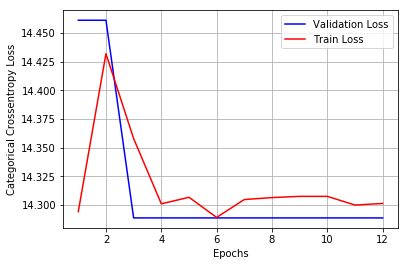

In [33]:
#evaluating model
score=convnet5.evaluate(x_test,y_test,verbose=0)
test_score5=score[0]
test_accuracy5=score[1]
train_accuracy5=max(convnet5_history.history['acc'])
print('test score :',test_score5)
print('test Accuracy :',test_accuracy5)
# error plot
x=list(range(1,epochs+1))
vy=convnet5_history.history['val_loss'] 
ty=convnet5_history.history['loss'] 
plt_dynamic(x, vy, ty)

### With batch normalization and dropout(0.5)

In [48]:
convnet5=Sequential() # Initializing the model

# First ConvNet
convnet5.add(Conv2D(16,kernel_size=(5,5),
                    activation='relu',
                    padding='same',
                    input_shape=input_shape))
#Second Convnet

convnet5.add(Conv2D(32,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.5))
convnet5.add(BatchNormalization())



#Third Convnet

convnet5.add(Conv2D(64,kernel_size=(5,5),
                    padding='same',
                   activation='relu'))  
#maxpooling by (2,2 ) ,dropout,flattening
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.5))
convnet5.add(BatchNormalization())


#Fourth Convnet

convnet5.add(Conv2D(128,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.5))
convnet5.add(BatchNormalization())


#Fifth Convnet
convnet5.add(Conv2D(256,kernel_size=(5,5),
                    padding='same',
                    activation='relu'))
convnet5.add(MaxPooling2D(pool_size=(2,2)))
convnet5.add(Dropout(0.5))
convnet5.add(BatchNormalization())
convnet5.add(Flatten())

#hidden_layer
convnet5.add(Dense(128,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet5.add(Dense(num_classes,activation='softmax'))
print(convnet5.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 28, 28, 32)        12832     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 7, 7, 64)        

In [49]:
#Model compilation
convnet5.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet5_history=convnet5.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 527s 9ms/step - loss: 0.4415 - acc: 0.8582 - val_loss: 0.0899 - val_acc: 0.9723
Epoch 2/12
60000/60000 [==============================] - 507s 8ms/step - loss: 0.1059 - acc: 0.9685 - val_loss: 0.0402 - val_acc: 0.9871
Epoch 3/12
60000/60000 [==============================] - 510s 9ms/step - loss: 0.0805 - acc: 0.9760 - val_loss: 0.0325 - val_acc: 0.9906
Epoch 4/12
60000/60000 [==============================] - 519s 9ms/step - loss: 0.0681 - acc: 0.9790 - val_loss: 0.0349 - val_acc: 0.9889
Epoch 5/12
60000/60000 [==============================] - 515s 9ms/step - loss: 0.0630 - acc: 0.9814 - val_loss: 0.0575 - val_acc: 0.9834
Epoch 6/12
60000/60000 [==============================] - 508s 8ms/step - loss: 0.0549 - acc: 0.9834 - val_loss: 0.0241 - val_acc: 0.9935
Epoch 7/12
60000/60000 [==============================] - 509s 8ms/step - loss: 0.0539 - acc: 0.9841 - val_loss: 0.0361 - 

test score : 0.03521839593031909
test Accuracy : 0.9908


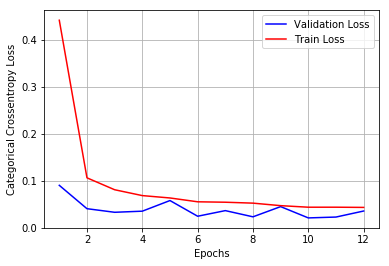

In [50]:
#evaluating model
score=convnet5.evaluate(x_test,y_test,verbose=0)
test_score5=score[0]
test_accuracy5=score[1]
train_accuracy5=max(convnet5_history.history['acc'])
print('test score :',test_score5)
print('test Accuracy :',test_accuracy5)
# error plot
x=list(range(1,epochs+1))
vy=convnet5_history.history['val_loss'] 
ty=convnet5_history.history['loss'] 
plt_dynamic(x, vy, ty)

## CNN with seven layers(16-32-64-128-196-256-512)


In [18]:
convnet7=Sequential() # Initializing the model

# First ConvNet
convnet7.add(Conv2D(16,kernel_size=(2,2),
                    activation='relu',
                    padding='same',strides=(1,1),
                    input_shape=input_shape))

# Second ConvNet

convnet7.add(Conv2D(32,kernel_size=(2,2),
                    padding='same',strides=(2,2),
                    activation='relu'))

# Third ConvNet
onvNet
convnet7.add(Conv2D(64,kernel_size=(2,2),
                    padding='same',
                   activation='relu'))  
convnet7.add(Dropout(0.15))

# Fourth ConvNet

convnet7.add(Conv2D(128,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.39))

# Fifth ConvNet

convnet7.add(Conv2D(196,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.3))

# Sixth ConvNet
convnet7.add(Conv2D(256,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))
# Seventh Convnet

convnet7.add(Conv2D(512,kernel_size=(2,2),
                    padding='same',strides=(1,1),
                    activation='relu'))

convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.4))
convnet7.add(Flatten())

#hidden_layer
convnet7.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet7.add(BatchNormalization())
convnet7.add(Dropout(0.5))
convnet7.add(Dense(num_classes,activation='softmax'))
print(convnet7.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        2080      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 128)        

In [19]:
convnet7.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet7_history=convnet7.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 343s 6ms/step - loss: 0.6873 - acc: 0.7848 - val_loss: 0.0713 - val_acc: 0.9776
Epoch 2/12
60000/60000 [==============================] - 343s 6ms/step - loss: 0.1262 - acc: 0.9624 - val_loss: 0.0450 - val_acc: 0.9861
Epoch 3/12
60000/60000 [==============================] - 363s 6ms/step - loss: 0.0883 - acc: 0.9739 - val_loss: 0.0308 - val_acc: 0.9898
Epoch 4/12
60000/60000 [==============================] - 350s 6ms/step - loss: 0.0698 - acc: 0.9794 - val_loss: 0.0293 - val_acc: 0.9910
Epoch 5/12
60000/60000 [==============================] - 349s 6ms/step - loss: 0.0589 - acc: 0.9829 - val_loss: 0.0380 - val_acc: 0.9890
Epoch 6/12
60000/60000 [==============================] - 337s 6ms/step - loss: 0.0501 - acc: 0.9846 - val_loss: 0.0239 - val_acc: 0.9920
Epoch 7/12
60000/60000 [==============================] - 337s 6ms/step - loss: 0.0473 - acc: 0.9859 - val_loss: 0.0286 - 

test score : 0.021896035060909345
test Accuracy : 0.9938


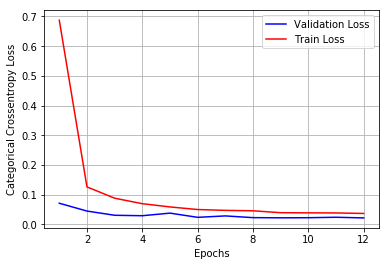

In [20]:
#evaluating model
score=convnet7.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(convnet7_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=convnet7_history.history['val_loss'] 
ty=convnet7_history.history['loss'] 
plt_dynamic(x, vy, ty)

### With BatchNormalization

In [52]:
convnet7=Sequential() # Initializing the model

# First ConvNet
convnet7.add(Conv2D(16,kernel_size=(2,2),
                    activation='relu',
                    padding='same',strides=(1,1),
                    input_shape=input_shape))

# Second ConvNet

convnet7.add(Conv2D(32,kernel_size=(2,2),
                    padding='same',strides=(2,2),
                    activation='relu'))
convnet7.add(BatchNormalization())


# Third ConvNet

convnet7.add(Conv2D(64,kernel_size=(2,2),
                    padding='same',
                   activation='relu'))  
convnet7.add(BatchNormalization())

# Fourth ConvNet

convnet7.add(Conv2D(128,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(BatchNormalization())

# Fifth ConvNet

convnet7.add(Conv2D(196,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(BatchNormalization())

# Sixth ConvNet
convnet7.add(Conv2D(256,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))
convnet7.add(BatchNormalization())

# Seventh Convnet

convnet7.add(Conv2D(512,kernel_size=(2,2),
                    padding='same',strides=(1,1),
                    activation='relu'))

convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(BatchNormalization())
convnet7.add(Flatten())

#hidden_layer
convnet7.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet7.add(BatchNormalization())
convnet7.add(Dense(num_classes,activation='softmax'))
print(convnet7.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_75 (Conv2D)           (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 14, 14, 32)        2080      
_________________________________________________________________
batch_normalization_32 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
batch_normalization_33 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 7, 7, 128)       

In [53]:
convnet7.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet7_history=convnet7.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 485s 8ms/step - loss: 0.1075 - acc: 0.9670 - val_loss: 0.0534 - val_acc: 0.9820
Epoch 2/12
60000/60000 [==============================] - 478s 8ms/step - loss: 0.0344 - acc: 0.9895 - val_loss: 0.0411 - val_acc: 0.9868
Epoch 3/12
60000/60000 [==============================] - 478s 8ms/step - loss: 0.0229 - acc: 0.9927 - val_loss: 0.0492 - val_acc: 0.9853
Epoch 4/12
60000/60000 [==============================] - 479s 8ms/step - loss: 0.0231 - acc: 0.9927 - val_loss: 0.0308 - val_acc: 0.9907
Epoch 5/12
60000/60000 [==============================] - 479s 8ms/step - loss: 0.0148 - acc: 0.9950 - val_loss: 0.0418 - val_acc: 0.9874
Epoch 6/12
60000/60000 [==============================] - 480s 8ms/step - loss: 0.0153 - acc: 0.9950 - val_loss: 0.0339 - val_acc: 0.9904
Epoch 7/12
60000/60000 [==============================] - 477s 8ms/step - loss: 0.0122 - acc: 0.9961 - val_loss: 0.0470 - 

test score : 0.07181618752231515
test Accuracy : 0.9823


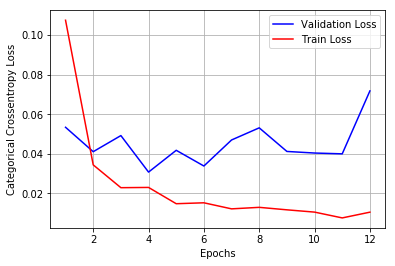

In [54]:
#evaluating model
score=convnet7.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(convnet7_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=convnet7_history.history['val_loss'] 
ty=convnet7_history.history['loss'] 
plt_dynamic(x, vy, ty)

### With Dropout(0.4)


In [57]:
convnet7=Sequential() # Initializing the model

# First ConvNet
convnet7.add(Conv2D(16,kernel_size=(2,2),
                    activation='relu',
                    padding='same',strides=(1,1),
                    input_shape=input_shape))

# Second ConvNet

convnet7.add(Conv2D(32,kernel_size=(2,2),
                    padding='same',strides=(2,2),
                    activation='relu'))
convnet7.add(Dropout(0.4))


# Third ConvNet

convnet7.add(Conv2D(64,kernel_size=(2,2),
                    padding='same',
                   activation='relu'))  
convnet7.add(Dropout(0.4))

# Fourth ConvNet

convnet7.add(Conv2D(128,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.4))

# Fifth ConvNet

convnet7.add(Conv2D(196,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.4))

# Sixth ConvNet
convnet7.add(Conv2D(256,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))
convnet7.add(Dropout(0.4))

# Seventh Convnet

convnet7.add(Conv2D(512,kernel_size=(2,2),
                    padding='same',strides=(1,1),
                    activation='relu'))

convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.4))
convnet7.add(Flatten())

#hidden_layer
convnet7.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet7.add(BatchNormalization())
convnet7.add(Dense(num_classes,activation='softmax'))
print(convnet7.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 14, 14, 32)        2080      
_________________________________________________________________
dropout_50 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
dropout_51 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 14, 14, 128)       32896     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 7, 7, 128)       

In [58]:
convnet7.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet7_history=convnet7.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 374s 6ms/step - loss: 1.5306 - acc: 0.4697 - val_loss: 1.3654 - val_acc: 0.6172
Epoch 2/12
60000/60000 [==============================] - 360s 6ms/step - loss: 0.6378 - acc: 0.7902 - val_loss: 0.3713 - val_acc: 0.8765
Epoch 3/12
60000/60000 [==============================] - 357s 6ms/step - loss: 0.5432 - acc: 0.8243 - val_loss: 0.3415 - val_acc: 0.8839
Epoch 4/12
60000/60000 [==============================] - 358s 6ms/step - loss: 0.4418 - acc: 0.8603 - val_loss: 0.2511 - val_acc: 0.9173
Epoch 5/12
60000/60000 [==============================] - 357s 6ms/step - loss: 0.3779 - acc: 0.8793 - val_loss: 0.2171 - val_acc: 0.9303
Epoch 6/12
60000/60000 [==============================] - 358s 6ms/step - loss: 0.3349 - acc: 0.8938 - val_loss: 0.1754 - val_acc: 0.9448
Epoch 7/12
60000/60000 [==============================] - 386s 6ms/step - loss: 0.3059 - acc: 0.9034 - val_loss: 0.1743 - 

test score : 0.09609409679695964
test Accuracy : 0.9681


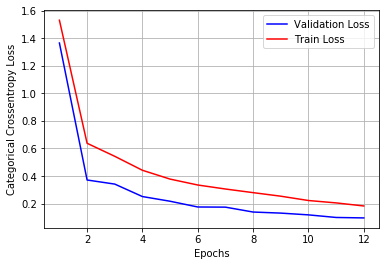

In [59]:
#evaluating model
score=convnet7.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(convnet7_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=convnet7_history.history['val_loss'] 
ty=convnet7_history.history['loss'] 
plt_dynamic(x, vy, ty)

### With batch normalization and dropout(0.3)

In [60]:
convnet7=Sequential() # Initializing the model

# First ConvNet
convnet7.add(Conv2D(16,kernel_size=(2,2),
                    activation='relu',
                    padding='same',strides=(1,1),
                    input_shape=input_shape))

# Second ConvNet

convnet7.add(Conv2D(32,kernel_size=(2,2),
                    padding='same',strides=(2,2),
                    activation='relu'))
convnet7.add(Dropout(0.3))
convnet7.add(BatchNormalization())

# Third ConvNet

convnet7.add(Conv2D(64,kernel_size=(2,2),
                    padding='same',
                   activation='relu'))  
convnet7.add(Dropout(0.3))
convnet7.add(BatchNormalization())

# Fourth ConvNet

convnet7.add(Conv2D(128,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.3))
convnet7.add(BatchNormalization())

# Fifth ConvNet

convnet7.add(Conv2D(196,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))
convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.3))
convnet7.add(BatchNormalization())

# Sixth ConvNet
convnet7.add(Conv2D(256,kernel_size=(2,2),
                    padding='same',
                    activation='relu'))
convnet7.add(Dropout(0.3))
convnet7.add(BatchNormalization())

# Seventh Convnet

convnet7.add(Conv2D(512,kernel_size=(2,2),
                    padding='same',strides=(1,1),
                    activation='relu'))

convnet7.add(MaxPooling2D(pool_size=(2,2)))
convnet7.add(Dropout(0.3))
convnet7.add(BatchNormalization())
convnet7.add(Flatten())

#hidden_layer
convnet7.add(Dense(256,
                   activation='relu',
                   kernel_initializer=he_normal(seed=None)))
convnet7.add(Dense(num_classes,activation='softmax'))
print(convnet7.summary())

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_96 (Conv2D)           (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 14, 14, 32)        2080      
_________________________________________________________________
dropout_56 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
dropout_57 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 14, 14, 64)      

In [62]:
convnet7.compile(optimizer=keras.optimizers.Adam(),
                loss=keras.losses.categorical_crossentropy,
                metrics=['accuracy'])
convnet7_history=convnet7.fit(x_train,y_train,batch_size=batch_size,
                             epochs=epochs,
                             verbose=1,
                             validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 537s 9ms/step - loss: 0.3595 - acc: 0.8803 - val_loss: 0.1159 - val_acc: 0.9659
Epoch 2/12
60000/60000 [==============================] - 529s 9ms/step - loss: 0.1244 - acc: 0.9610 - val_loss: 0.0647 - val_acc: 0.9820
Epoch 3/12
60000/60000 [==============================] - 535s 9ms/step - loss: 0.0896 - acc: 0.9717 - val_loss: 0.0548 - val_acc: 0.9837
Epoch 4/12
60000/60000 [==============================] - 622s 10ms/step - loss: 0.0747 - acc: 0.9767 - val_loss: 0.0493 - val_acc: 0.9850
Epoch 5/12
60000/60000 [==============================] - 599s 10ms/step - loss: 0.0627 - acc: 0.9807 - val_loss: 0.0516 - val_acc: 0.9858
Epoch 6/12
60000/60000 [==============================] - 535s 9ms/step - loss: 0.0584 - acc: 0.9812 - val_loss: 0.0886 - val_acc: 0.9761
Epoch 7/12
60000/60000 [==============================] - 525s 9ms/step - loss: 0.0524 - acc: 0.9834 - val_loss: 0.0318 

test score : 0.02688342617054659
test Accuracy : 0.993


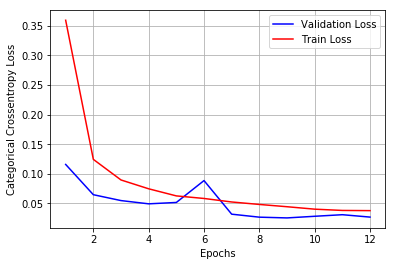

In [63]:
#evaluating model
score=convnet7.evaluate(x_test,y_test,verbose=0)
test_score7=score[0]
test_accuracy7=score[1]
train_accuracy7=max(convnet7_history.history['acc'])
print('test score :',test_score7)
print('test Accuracy :',test_accuracy7)
# error plot
x=list(range(1,epochs+1))
vy=convnet7_history.history['val_loss'] 
ty=convnet7_history.history['loss'] 
plt_dynamic(x, vy, ty)

## Observation

In [64]:
from prettytable import PrettyTable

x_pretty_table = PrettyTable()
x_pretty_table.field_names = ["Model name","Kernal Size","Train-AUC","Test-AUC","Test Score"]

x_pretty_table.add_row(["3 ConvNet with dropout","3x3",0.9950,0.9926,0.0257])
x_pretty_table.add_row(["3 ConvNet without dropout and batch normalization","3x3",1.0000,0.9942,0.0369])
x_pretty_table.add_row(["3 ConvNet with dropout","3x3",0.9984,0.9935,0.0217])
x_pretty_table.add_row(["3 ConvNet with dropout and batch normalization","3x3",0.3987,0.2134,11.57])

x_pretty_table.add_row(["5 ConvNet with dropout","5x5",0.9888,0.9934,0.0214])
x_pretty_table.add_row(["5 ConvNet without dropout and batch normalization ","5x5",0.9987,0.9913,0.0313])
x_pretty_table.add_row(["5 ConvNet with dropout","5x5",0.1127,0.1135,14.289])
x_pretty_table.add_row(["5 ConvNet with dropout and batch normalization","5x5",0.9871,0.9908,0.0352])

x_pretty_table.add_row(["7 ConvNet with dropout","2x2",0.9893,0.9938,0.0219])
x_pretty_table.add_row(["7 ConvNet with batch normalization","2x2",0.9963,0.9823,0.0718])
x_pretty_table.add_row(["7 ConvNet with dropout","2x2",0.9418,0.9681,0.0960])
x_pretty_table.add_row(["7 ConvNet with dropout and batch normalization","2x2",0.9883,0.993,0.0269])

print(x_pretty_table)




+----------------------------------------------------+-------------+-----------+----------+------------+
|                     Model name                     | Kernal Size | Train-AUC | Test-AUC | Test Score |
+----------------------------------------------------+-------------+-----------+----------+------------+
|               3 ConvNet with dropout               |     3x3     |   0.995   |  0.9926  |   0.0257   |
| 3 ConvNet without dropout and batch normalization  |     3x3     |    1.0    |  0.9942  |   0.0369   |
|               3 ConvNet with dropout               |     3x3     |   0.9984  |  0.9935  |   0.0217   |
|   3 ConvNet with dropout and batch normalization   |     3x3     |   0.3987  |  0.2134  |   11.57    |
|               5 ConvNet with dropout               |     5x5     |   0.9888  |  0.9934  |   0.0214   |
| 5 ConvNet without dropout and batch normalization  |     5x5     |   0.9987  |  0.9913  |   0.0313   |
|               5 ConvNet with dropout               | 

### Tried three CNN architecture on MNIST dataset 
#### 1.Most of the models are giving good performance
#### 2.Models without dropout tries to overfit the train data
#### 3.3 CNN model with dropout,batch normalization and 5 CNN model with dropout gives bad results
#### 4.Represented the all three architectures results using prettytable library
